In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import tensorflow as tf

In [2]:
np.set_printoptions(precision=4, threshold=15)

## Dataset

In [55]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.boston_housing.load_data()
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (404, 13)
X_test shape :  (102, 13)
y_train shape :  (404,)
y_test shape :  (102,)


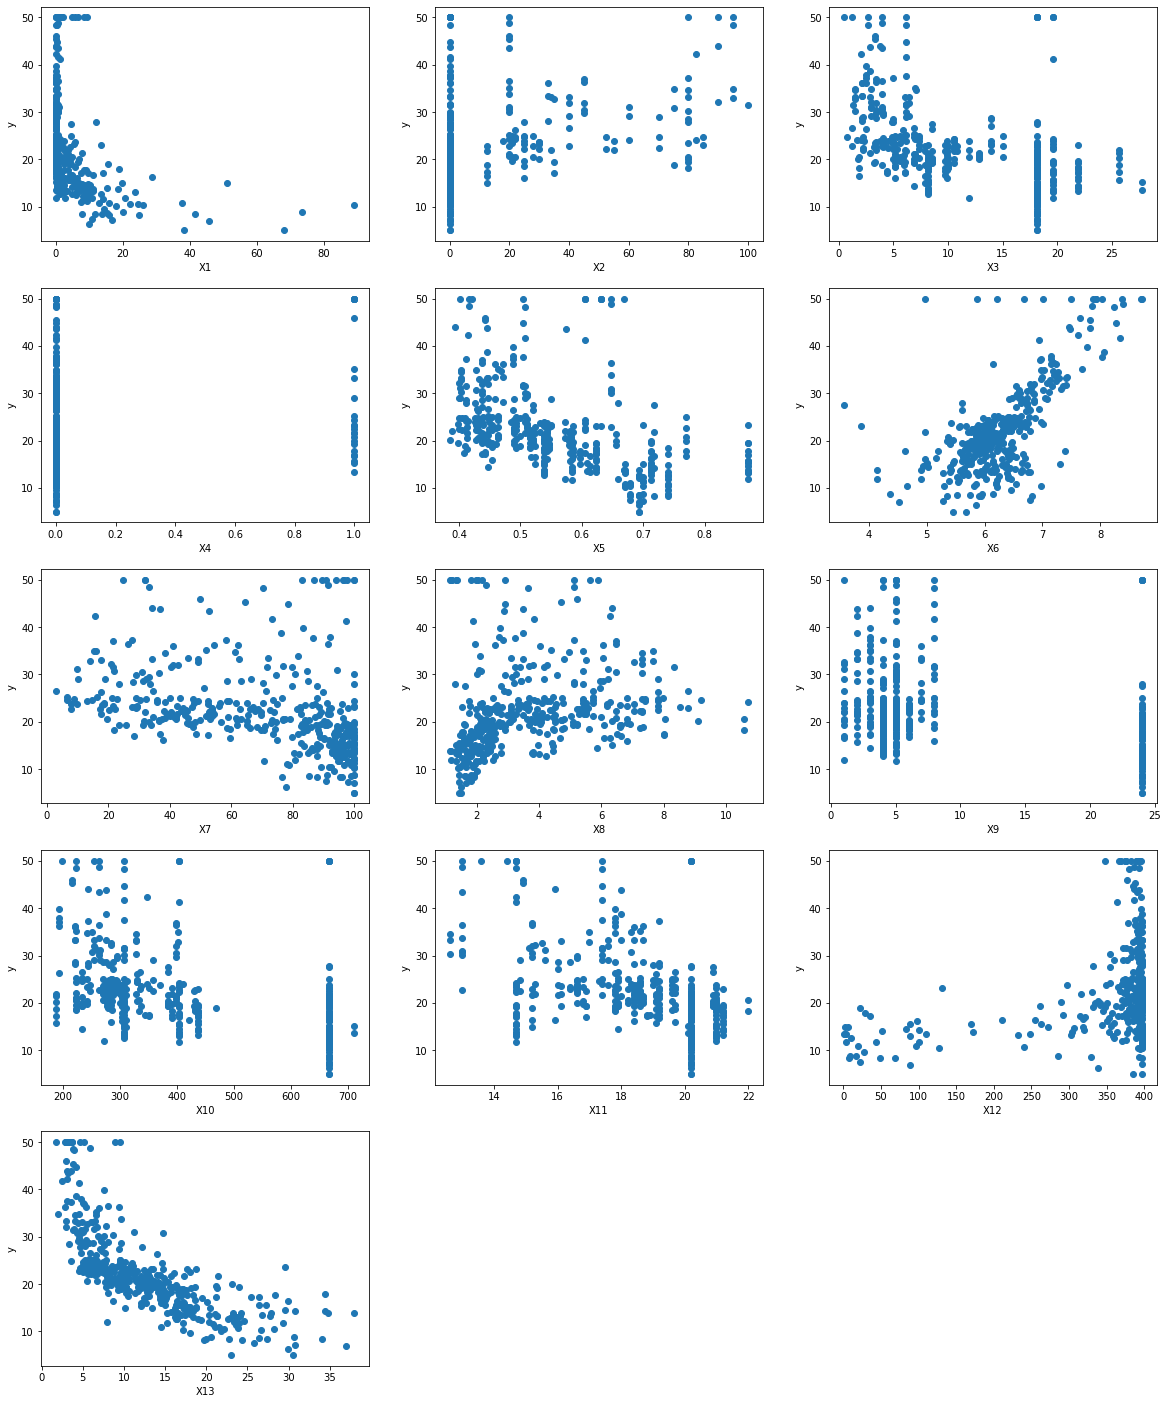

In [71]:
plt.figure(figsize=(20, 25))
for i in range(13):
    plt.subplot(5, 3, i + 1)
    plt.scatter(X_train[:, i], y_train)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')

## Multiple Linear Regression Model

In [75]:
class MultipleLinearRegressor:
    def __init__(self,n_features, weights=None, normalize=True):
        self.__n_features = n_features
        self.weights = weights if weights else np.random.randn(self.__n_features + 1) 
        self.__normalize = normalize
        self.__scaling_params = (0, 1)
        self.loss_per_epochs = []
           
    def __transform(self, X):
        if self.__normalize:
            mu, s = self.__scaling_params
            X = (X - mu) / (s + 1e-9)
        return np.vstack([np.ones(X.shape[0]), X.T])
        
    def fit(self, X, y, epochs=1, batch_size=None, alpha=0.001, verbose=True):
        self.__scaling_params = (X.mean(axis=0), X.std(axis=0))
        X = self.__transform(X)
        losses = []
        for i in range(epochs):
            y_pred = self.weights.T @ X
            J = 0.5 * np.mean(np.square(y - y_pred))
            self.weights -= alpha * np.mean((y_pred - y) * X, axis=1)
            losses.append(J)
            if verbose:
                print(f'Epoch {i+1}/{epochs}\n{X.shape[-1]}/{X.shape[-1]} [==============] : loss = {J}')
        self.loss_per_epochs = losses
        
    def predict(self, X):
        return self.weights.T @ self.__transform(X)
    
    def get_weights(self, return_scaling_params=False):
        """returns weights as a dict object with keys - `weights` and `bias`"""
        model_weights = {'weights' : self.weights[1:], 'bias' : self.weights[0]}
        if return_scaling_params:
            model_weights['scaling_mean'], model_weights['scaling_std'] = self.__scaling_params
        return model_weights 

## Training

In [100]:
model = MultipleLinearRegressor(n_features=13)

In [101]:
model.fit(X_train, y_train, epochs=200, alpha=0.05)

Epoch 1/200
404/404 [==============] : loss = 258.43957208171395
Epoch 2/200
404/404 [==============] : loss = 234.48507493598945
Epoch 3/200
404/404 [==============] : loss = 212.87815474456292
Epoch 4/200
404/404 [==============] : loss = 193.385688721319
Epoch 5/200
404/404 [==============] : loss = 175.79892269969068
Epoch 6/200
404/404 [==============] : loss = 159.93032430677627
Epoch 7/200
404/404 [==============] : loss = 145.61113370014314
Epoch 8/200
404/404 [==============] : loss = 132.68934148046185
Epoch 9/200
404/404 [==============] : loss = 121.02795516254055
Epoch 10/200
404/404 [==============] : loss = 110.50347952922743
Epoch 11/200
404/404 [==============] : loss = 101.00456760808885
Epoch 12/200
404/404 [==============] : loss = 92.43081478862648
Epoch 13/200
404/404 [==============] : loss = 84.69167682216008
Epoch 14/200
404/404 [==============] : loss = 77.70549699056606
Epoch 15/200
404/404 [==============] : loss = 71.39863045277792
Epoch 16/200
404/404 [===

Text(0.5, 1.0, 'Training Loss')

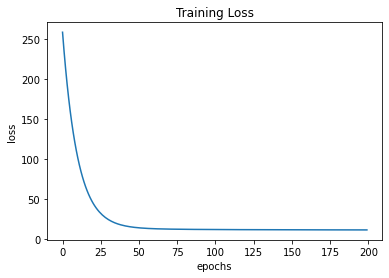

In [102]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [103]:
min(model.loss_per_epochs)

11.21885209609519

In [104]:
model.get_weights()

{'weights': array([-0.9363,  1.0538, -0.4717,  1.0631, -1.6746,  2.6373,  0.07  ,
        -2.9822,  1.4192, -0.5187, -1.8006,  0.864 , -3.9582]),
 'bias': 22.394293532701568}

In [105]:
indices = np.random.permutation(np.arange(X_train.shape[0]))[:100]
y_pred = model.predict(X_train[indices, :])
y_true = y_train[indices]

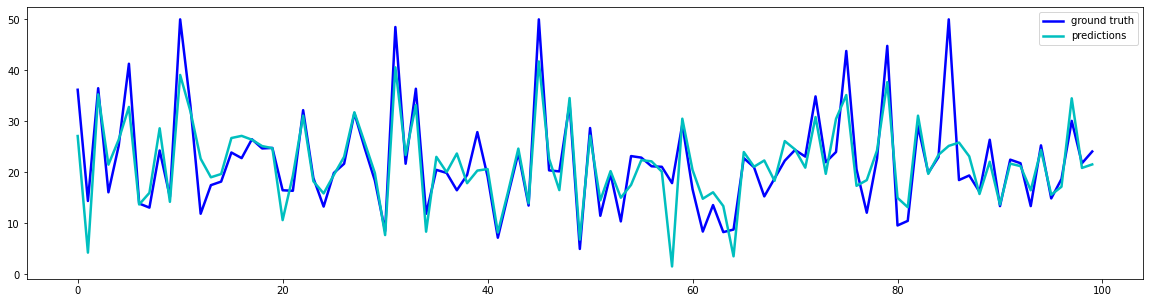

In [106]:
plt.figure(figsize=(20,5))
plt.plot(y_true, 'b', lw=2.5, label='ground truth')
plt.plot(y_pred, 'c', lw=2.5, label='predictions')
plt.legend(loc='best')

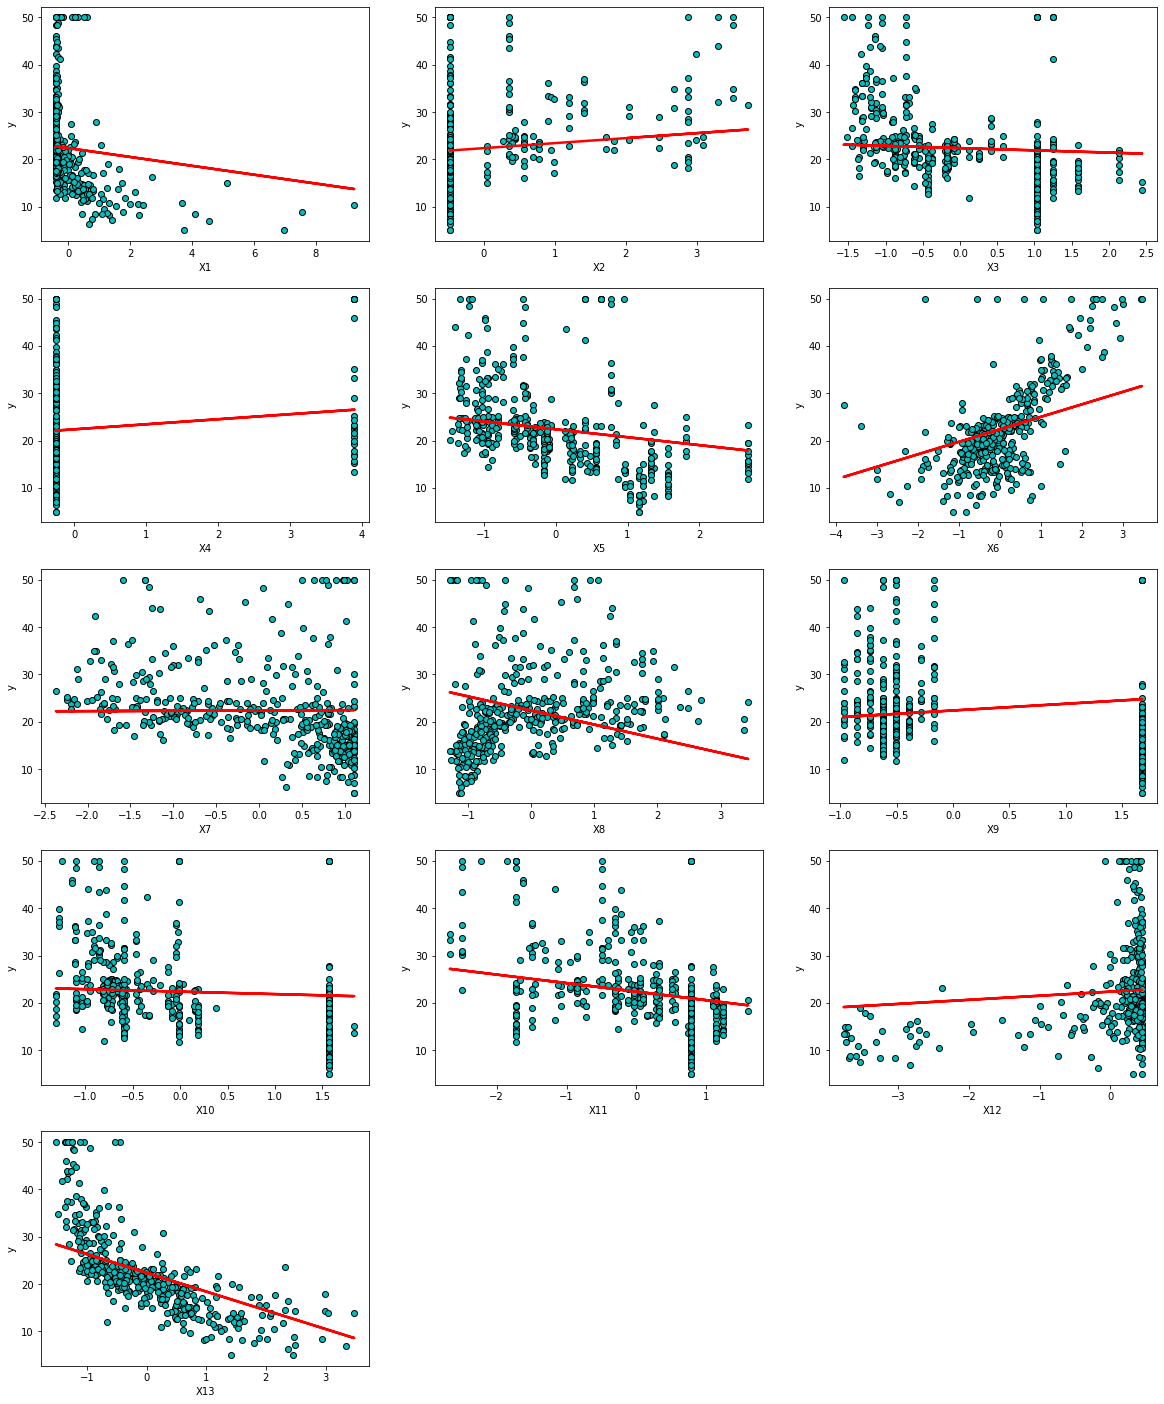

In [115]:
weights, bias, mean, std = model.get_weights(return_scaling_params=True).values()
plt.figure(figsize=(20, 25))
X = (X_train - mean) / (std + 1e-9)
for i in range(13):
    plt.subplot(5, 3, i + 1)
    plt.scatter(X[:, i], y_train, c='c', ec='k')
    y_pred = weights[i] * X[:, i] + bias
    plt.plot(X[:, i], y_pred, c='r', lw=2.5)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')

## Evaluation

In [109]:
y_pred = model.predict(X_test)

In [110]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  11.27952518227812


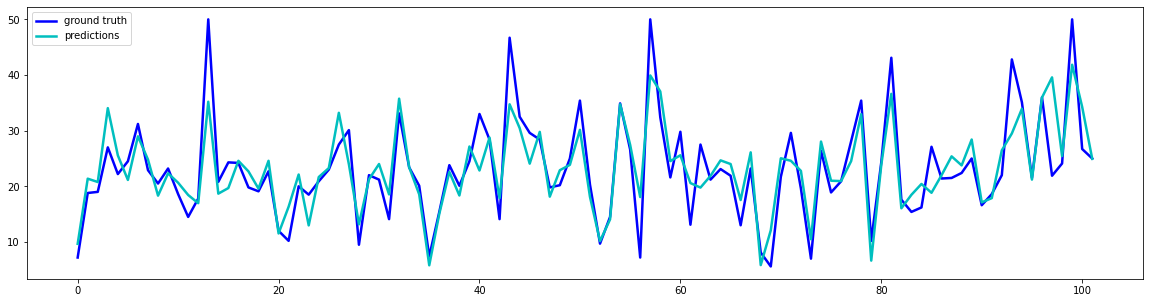

In [112]:
plt.figure(figsize=(20,5))
plt.plot(y_test, 'b', lw=2.5, label='ground truth')
plt.plot(y_pred, 'c', lw=2.5, label='predictions')
plt.legend(loc='best')

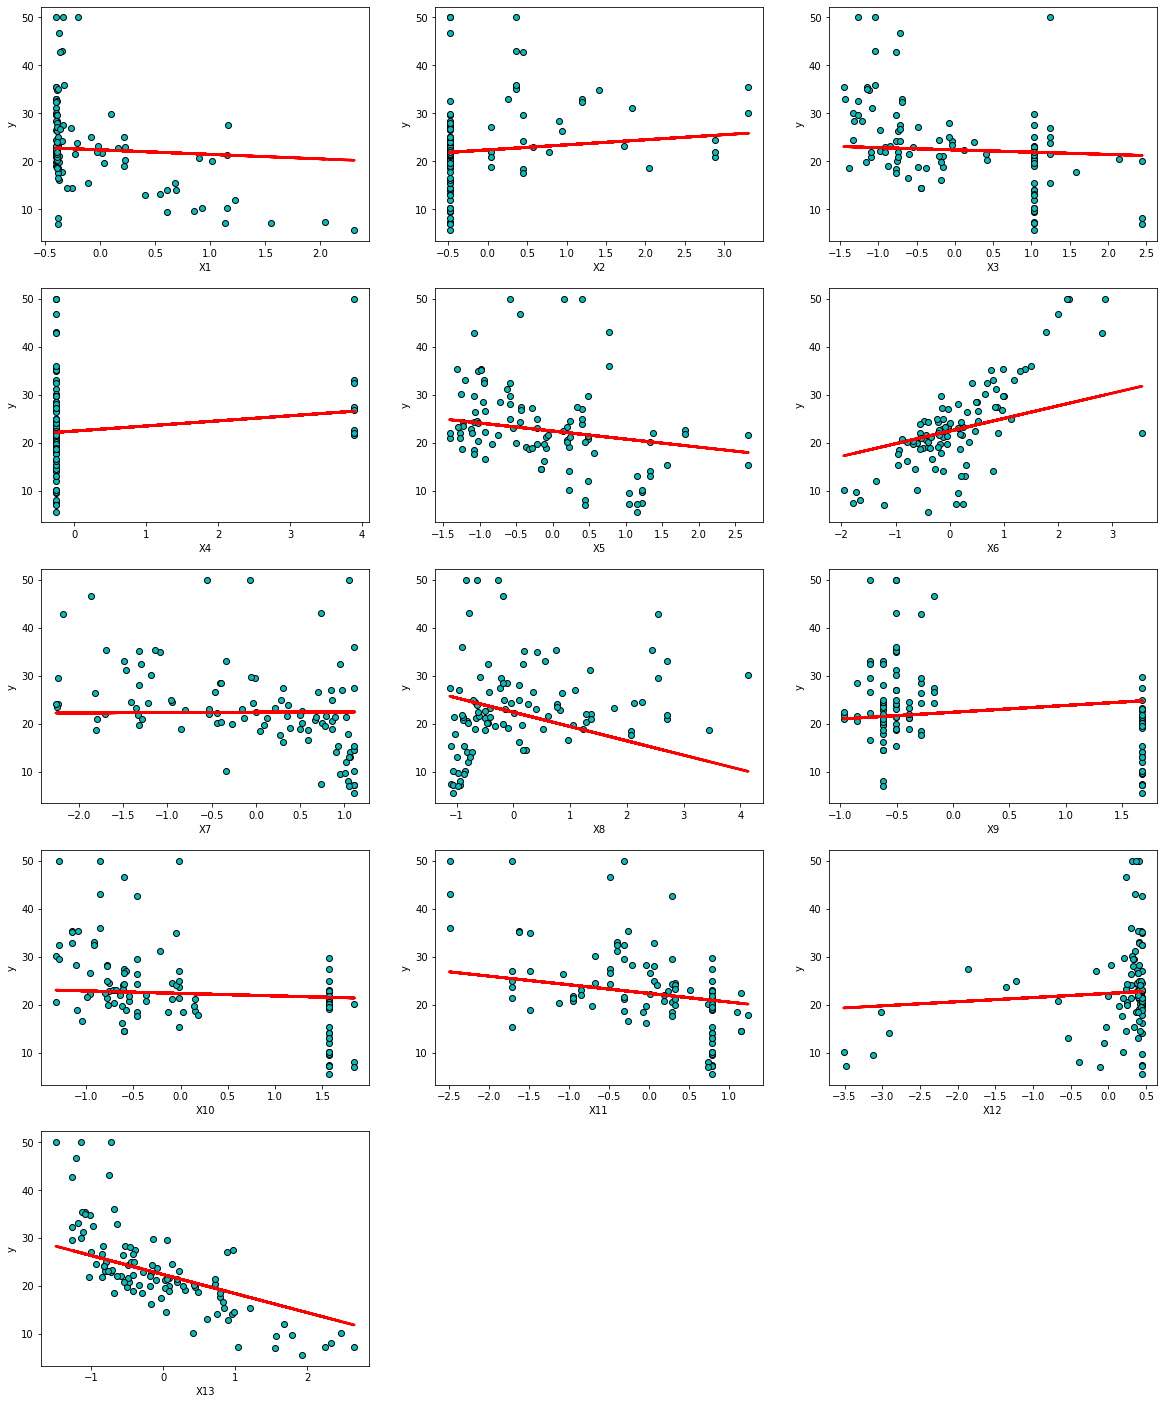

In [114]:
weights, bias, mean, std = model.get_weights(return_scaling_params=True).values()
plt.figure(figsize=(20, 25))
X = (X_test - mean) / (std + 1e-9)
for i in range(13):
    plt.subplot(5, 3, i + 1)
    plt.scatter(X[:, i], y_test, c='c', ec='k')
    y_pred = weights[i] * X[:, i] + bias
    plt.plot(X[:, i], y_pred, c='r', lw=2.5)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')